<a href="https://colab.research.google.com/github/JahongirFozilovich/Data-Science-practice/blob/main/Pridicting_Prices_of_houses_in_Tashkent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
df['district'].value_counts()

,count
district,
Чиланзарский,1641
Мирзо-Улугбекский,1382
Юнусабадский,883
Учтепинский,880
Мирабадский,773
Яккасарайский,658
Яшнободский,484
Шайхантахурский,396
Олмазорский,269


In [ ]:
df.describe()

,rooms,level,max_levels
count,7565.000000,7565.000000,7565.000000
mean,2.625644,3.699273,6.038202
std,1.085201,2.237275,2.613271
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,5.000000
75%,3.000000,5.000000,9.000000
max,10.000000,19.000000,25.000000


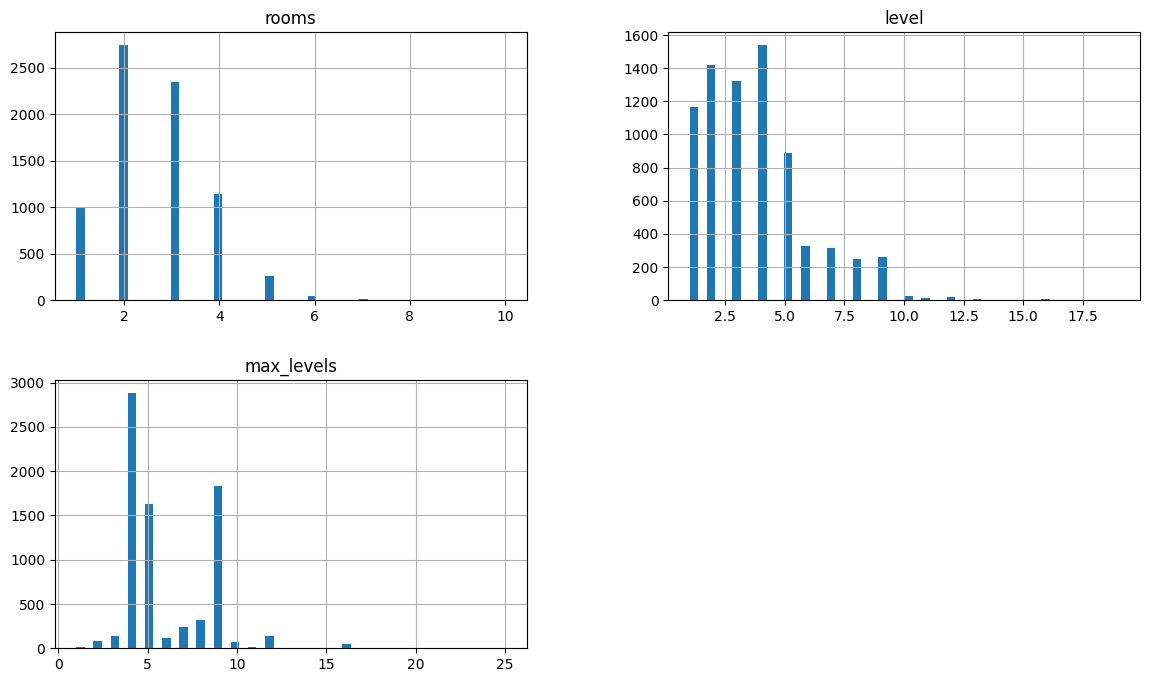

In [ ]:
df.hist(bins=50, figsize=(14,8))
plt.show()

In [ ]:
df.location.value_counts()

,count
location,
"город Ташкент, Чиланзарский район, Чиланзар",112
"город Ташкент, Яккасарайский район, Кушбеги",110
"город Ташкент, Мирзо-Улугбекский район, Буюк Ипак Йули",87
"город Ташкент, Яккасарайский район, Бабура",82
"город Ташкент, Учтепинский район, Чиланзар 24-й квартал",79
...,...
"город Ташкент, Яккасарайский район, 1-й тупик Шота Руставели",1
"город Ташкент, Юнусабадский район, Хусайни",1
"город Ташкент, Олмазорский район, Каракамиш2/4",1


In [ ]:
df[['city', 'region', 'location']] = df['location'].str.split(',', n=2, expand=True)

In [ ]:
df

,location,district,rooms,size,level,max_levels,price,city,region
0,Юнусабад 8-й квартал,Юнусабадский,3,57,4,4,52000,город Ташкент,Юнусабадский район
1,1-й тупик Шота Руставели,Яккасарайский,2,52,4,5,56000,город Ташкент,Яккасарайский район
2,Чиланзар 2-й квартал,Чиланзарский,2,42,4,4,37000,город Ташкент,Чиланзарский район
3,Чиланзар 9-й квартал,Чиланзарский,3,65,1,4,49500,город Ташкент,Чиланзарский район
4,площадь Актепа,Чиланзарский,3,70,3,5,55000,город Ташкент,Чиланзарский район
...,...,...,...,...,...,...,...,...,...
7560,Городок Авиастроителей 2-й квартал,Яшнободский,1,38,5,5,24500,город Ташкент,Яшнободский район
7561,1-й проезд Авиасозлар,Яшнободский,2,49,1,4,32000,город Ташкент,Яшнободский район
7562,Зульфияханум,Шайхантахурский,2,64,3,9,40000,город Ташкент,Шайхантахурский район
7563,Буюк Ипак Йули,Мирзо-Улугбекский,1,18,1,4,11000,город Ташкент,Мирзо-Улугбекский район


In [ ]:
df = df[['district', 'location', 'rooms', 'size', 'level', 'max_levels', 'price']]

In [ ]:
df

,district,location,rooms,size,level,max_levels,price
0,Юнусабадский,Юнусабад 8-й квартал,3,57,4,4,52000
1,Яккасарайский,1-й тупик Шота Руставели,2,52,4,5,56000
2,Чиланзарский,Чиланзар 2-й квартал,2,42,4,4,37000
3,Чиланзарский,Чиланзар 9-й квартал,3,65,1,4,49500
4,Чиланзарский,площадь Актепа,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,Яшнободский,Городок Авиастроителей 2-й квартал,1,38,5,5,24500
7561,Яшнободский,1-й проезд Авиасозлар,2,49,1,4,32000
7562,Шайхантахурский,Зульфияханум,2,64,3,9,40000
7563,Мирзо-Улугбекский,Буюк Ипак Йули,1,18,1,4,11000


In [ ]:
df

,district,location,rooms,size,level,max_levels,price
0,Юнусабадский,Юнусабад 8-й квартал,3,57,4,4,52000
1,Яккасарайский,1-й тупик Шота Руставели,2,52,4,5,56000
2,Чиланзарский,Чиланзар 2-й квартал,2,42,4,4,37000
3,Чиланзарский,Чиланзар 9-й квартал,3,65,1,4,49500
4,Чиланзарский,площадь Актепа,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,Яшнободский,Городок Авиастроителей 2-й квартал,1,38,5,5,24500
7561,Яшнободский,1-й проезд Авиасозлар,2,49,1,4,32000
7562,Шайхантахурский,Зульфияханум,2,64,3,9,40000
7563,Мирзо-Улугбекский,Буюк Ипак Йули,1,18,1,4,11000


In [ ]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=45 )

In [ ]:
train_set

,district,location,rooms,size,level,max_levels,price
5394,Сергелийский,Сергели-VII,3,58,5,7,42000
154,Мирабадский,Фидокор (Чехова),4,100,5,8,142000
1243,Чиланзарский,Чиланзар 7-й квартал,1,30,4,5,25000
3520,Мирабадский,Куйлюк 4-й квартал,2,56,3,5,40000
5005,Мирзо-Улугбекский,тупик Буюк Ипак Йули,3,72,3,5,58000
...,...,...,...,...,...,...,...
3616,Мирзо-Улугбекский,Паркент,2,62,2,9,44000
6012,Яккасарайский,Башлык,5,112,8,9,60000
5763,Мирзо-Улугбекский,Дом быта,1,30,3,4,22000
6558,Чиланзарский,Чиланзар 7-й квартал,2,46,3,4,40000


In [ ]:
housing = train_set

In [ ]:
housing

,district,location,rooms,size,level,max_levels,price
5394,Сергелийский,Сергели-VII,3,58,5,7,42000
154,Мирабадский,Фидокор (Чехова),4,100,5,8,142000
1243,Чиланзарский,Чиланзар 7-й квартал,1,30,4,5,25000
3520,Мирабадский,Куйлюк 4-й квартал,2,56,3,5,40000
5005,Мирзо-Улугбекский,тупик Буюк Ипак Йули,3,72,3,5,58000
...,...,...,...,...,...,...,...
3616,Мирзо-Улугбекский,Паркент,2,62,2,9,44000
6012,Яккасарайский,Башлык,5,112,8,9,60000
5763,Мирзо-Улугбекский,Дом быта,1,30,3,4,22000
6558,Чиланзарский,Чиланзар 7-й квартал,2,46,3,4,40000


In [ ]:
# Convert 'size' and 'price' columns to numeric, coercing any errors to NaN
housing['size'] = pd.to_numeric(housing['size'], errors='coerce')
housing['price'] = pd.to_numeric(housing['price'], errors='coerce')

# Calculate correlation only for the numeric columns in the DataFrame
housing.select_dtypes(include=np.number).corrwith(housing['rooms']).sort_values(ascending=False)

,0
rooms,1.000000
max_levels,0.179540
level,0.131412
price,0.053285
size,0.026522


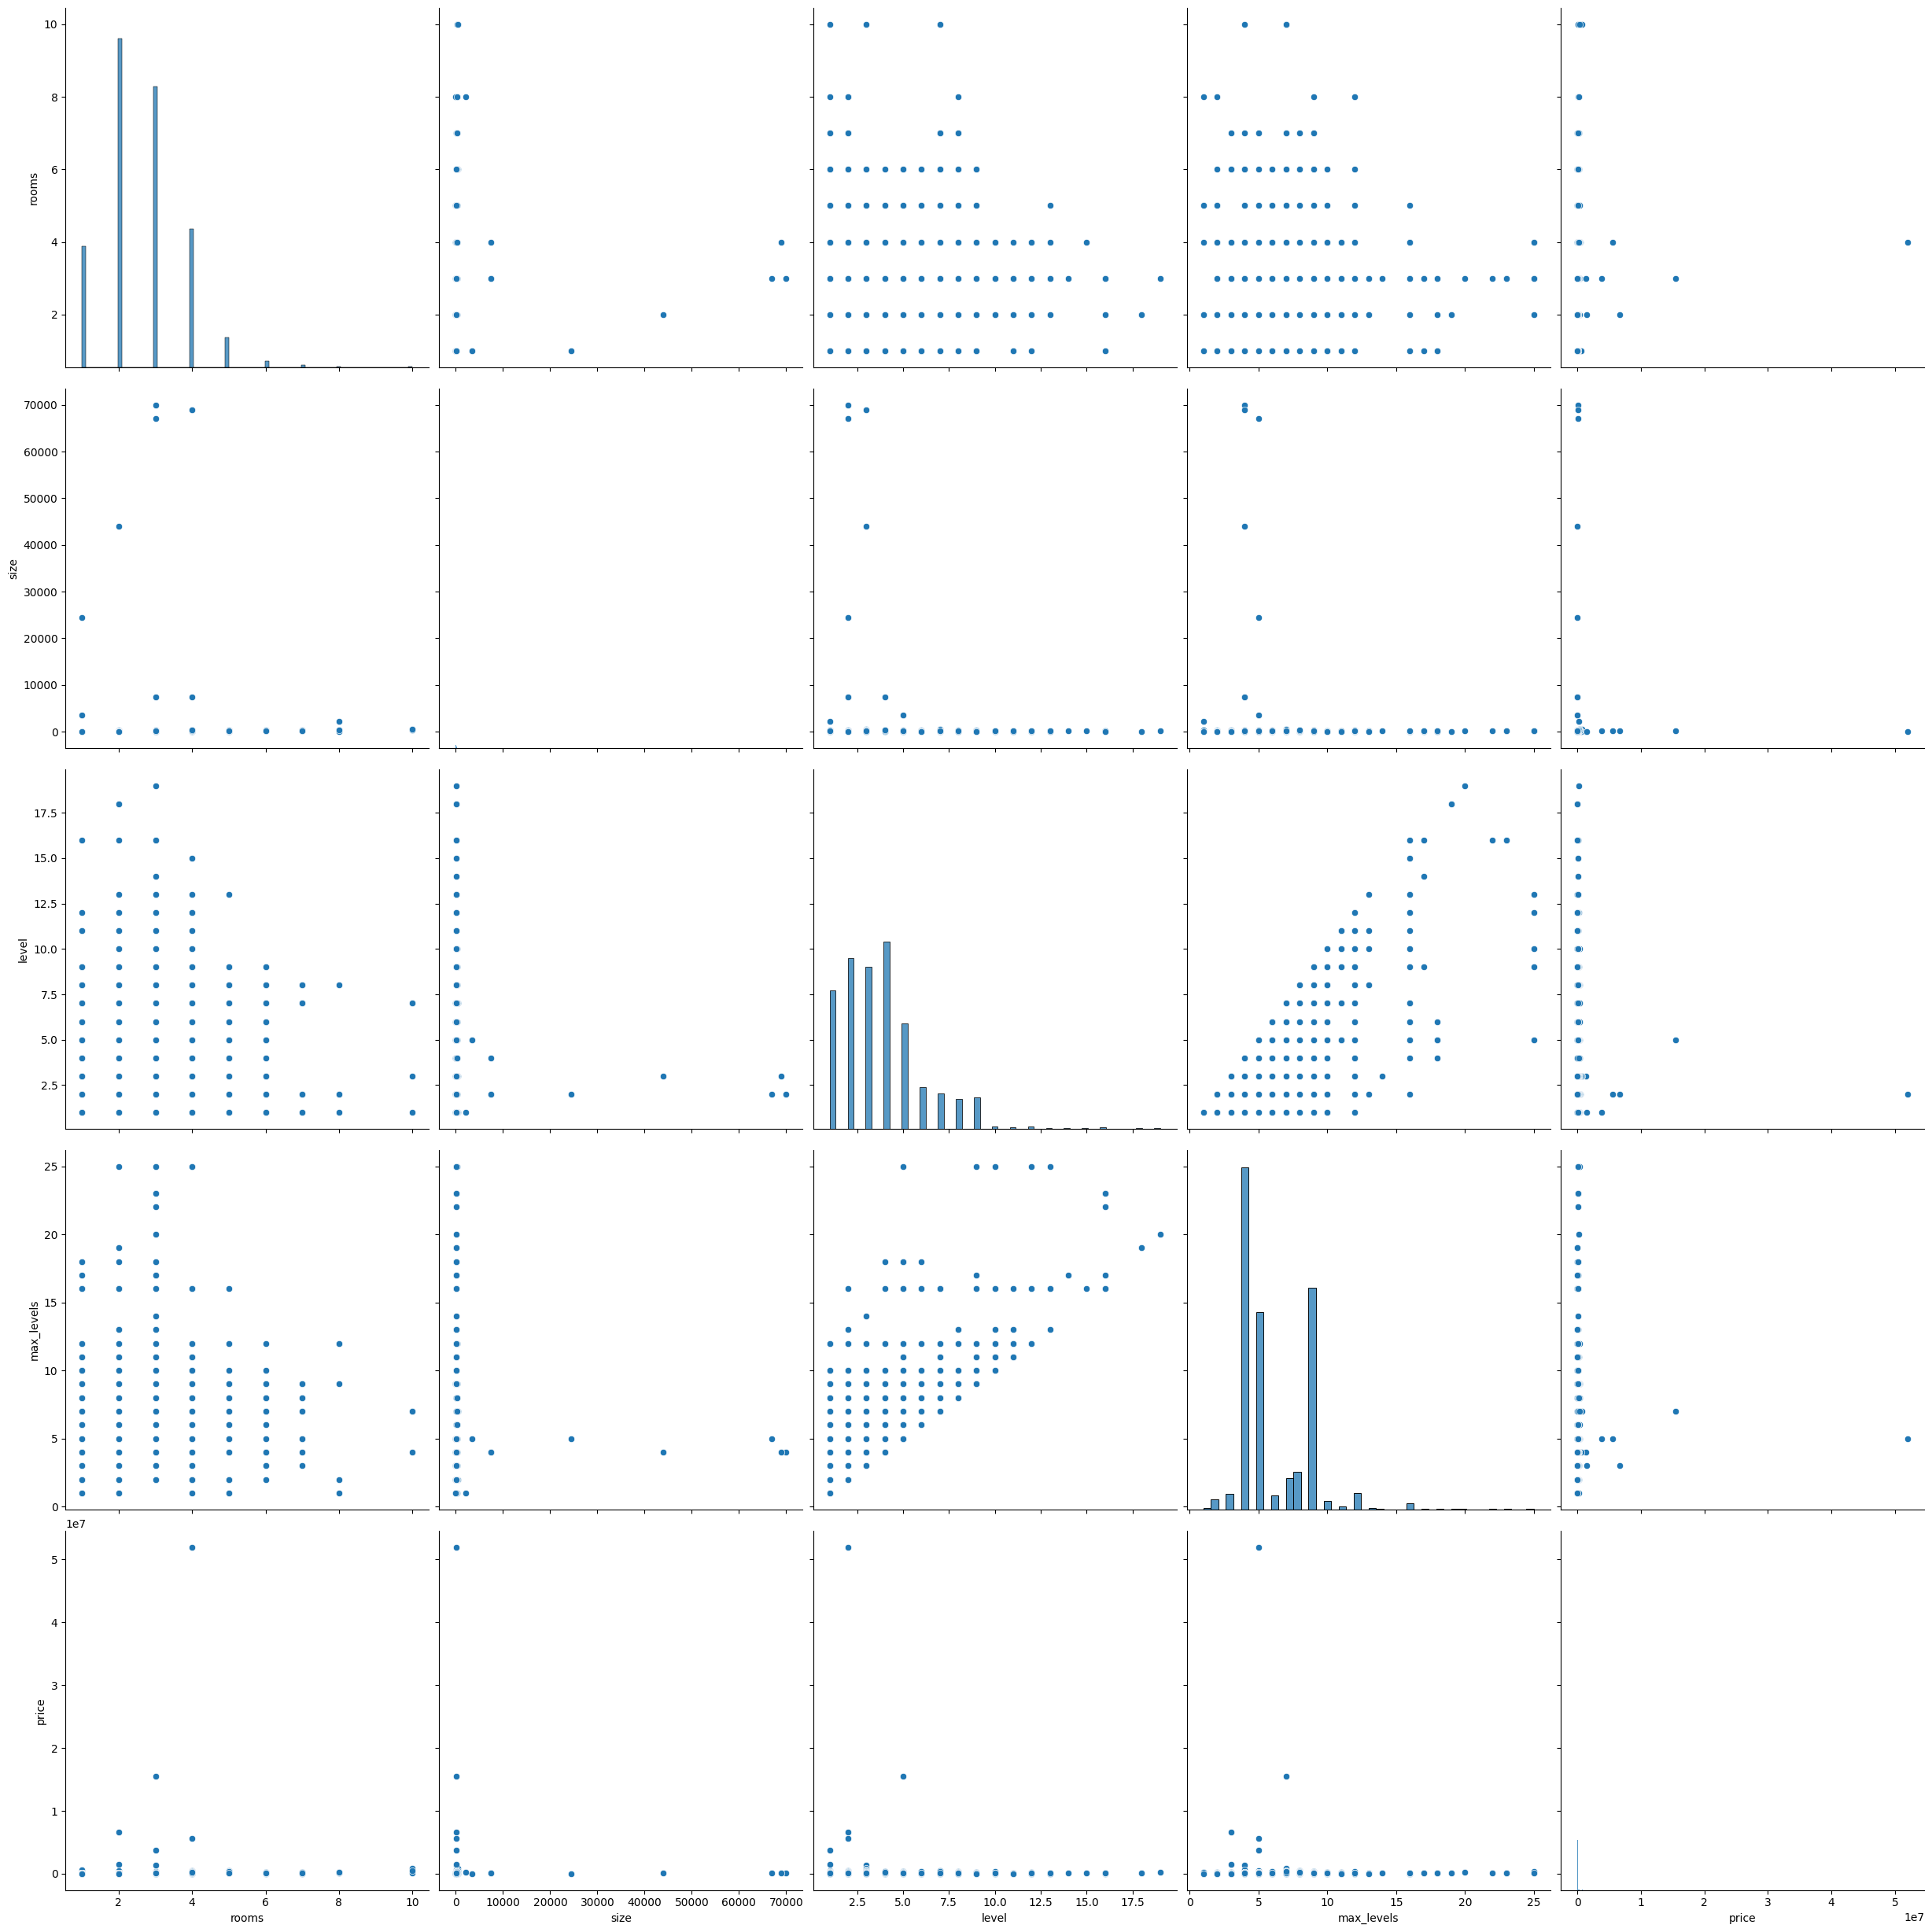

In [ ]:
cols = ['rooms','size','level','max_levels', 'price']
sns.pairplot(housing[cols], height=5)
plt.show()

In [ ]:
housing = train_set.drop('price', axis=1)
housing_labels = train_set['price'].copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    7565 non-null   object
 1   location    7535 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


In [ ]:
housing.location.ffill(inplace=True)

/tmp/ipython-input-2540226731.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing.location.ffill(inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')


In [ ]:
housing_num = housing.drop(['location', 'district'], axis=1)

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([ 3., 66.,  3.,  5.])

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [ ]:
housing_tr.head()

,rooms,size,level,max_levels
5394,3.0,58.0,5.0,7.0
154,4.0,100.0,5.0,8.0
1243,1.0,30.0,4.0,5.0
3520,2.0,56.0,3.0,5.0
5005,3.0,72.0,3.0,5.0


In [ ]:
housing_cat = housing[['location', 'district']]

In [ ]:
housing_cat

,location,district
5394,Сергели-VII,Сергелийский
154,Фидокор (Чехова),Мирабадский
1243,Чиланзар 7-й квартал,Чиланзарский
3520,Куйлюк 4-й квартал,Мирабадский
5005,тупик Буюк Ипак Йули,Мирзо-Улугбекский
...,...,...
3616,Паркент,Мирзо-Улугбекский
6012,Башлык,Яккасарайский
5763,Дом быта,Мирзо-Улугбекский
6558,Чиланзар 7-й квартал,Чиланзарский


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[7.910e+02, 4.000e+00],
       [9.440e+02, 1.000e+00],
       [1.048e+03, 6.000e+00],
       [5.270e+02, 1.000e+00],
       [1.306e+03, 2.000e+00],
       [1.032e+03, 5.000e+00],
       [8.530e+02, 9.000e+00],
       [3.760e+02, 6.000e+00],
       [6.300e+01, 1.100e+01],
       [7.800e+01, 9.000e+00]])

In [ ]:
ordinal_encoder.categories_

[array([' 1', ' 1 нотариальная', ' 1- проезд Султан Жура', ...,
        ' ц-6 Минор (Ц-6) ', ' янги куйлюк', ' Қатартал бозор'],
       dtype=object),
 array(['Бектемирский', 'Мирабадский', 'Мирзо-Улугбекский', 'Олмазорский',
        'Сергелийский', 'Учтепинский', 'Чиланзарский', 'Шайхантахурский',
        'Юнусабадский', 'Яккасарайский', 'Янгихаётский', 'Яшнободский'],
       dtype=object)]

In [ ]:
housing_cat.head()

,location,district
5394,Сергели-VII,Сергелийский
154,Фидокор (Чехова),Мирабадский
1243,Чиланзар 7-й квартал,Чиланзарский
3520,Куйлюк 4-й квартал,Мирабадский
5005,тупик Буюк Ипак Йули,Мирзо-Улугбекский


In [ ]:
housing

,district,location,rooms,size,level,max_levels
5394,Сергелийский,Сергели-VII,3,58.0,5,7
154,Мирабадский,Фидокор (Чехова),4,100.0,5,8
1243,Чиланзарский,Чиланзар 7-й квартал,1,30.0,4,5
3520,Мирабадский,Куйлюк 4-й квартал,2,56.0,3,5
5005,Мирзо-Улугбекский,тупик Буюк Ипак Йули,3,72.0,3,5
...,...,...,...,...,...,...
3616,Мирзо-Улугбекский,Паркент,2,62.0,2,9
6012,Яккасарайский,Башлык,5,112.0,8,9
5763,Мирзо-Улугбекский,Дом быта,1,30.0,3,4
6558,Чиланзарский,Чиланзар 7-й квартал,2,46.0,3,4


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit_transform(housing_num)

array([[0.22222222, 0.0008143 , 0.22222222, 0.25      ],
       [0.33333333, 0.00141431, 0.22222222, 0.29166667],
       [0.        , 0.00041429, 0.16666667, 0.16666667],
       ...,
       [0.        , 0.00041429, 0.11111111, 0.125     ],
       [0.11111111, 0.00064287, 0.11111111, 0.125     ],
       [0.22222222, 0.00105716, 0.11111111, 0.125     ]])

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit_transform(housing_num)

array([[ 0.34545894, -0.03900318,  0.58772433,  0.36414732],
       [ 1.26526427, -0.01380805,  0.58772433,  0.74762036],
       [-1.49415172, -0.05579993,  0.13725477, -0.40279876],
       ...,
       [-1.49415172, -0.05579993, -0.31321479, -0.78627181],
       [-0.57434639, -0.04620179, -0.31321479, -0.78627181],
       [ 0.34545894, -0.02880515, -0.31321479, -0.78627181]])

In [ ]:
housing.head()

,district,location,rooms,size,level,max_levels
5394,Сергелийский,Сергели-VII,3,58.0,5,7
154,Мирабадский,Фидокор (Чехова),4,100.0,5,8
1243,Чиланзарский,Чиланзар 7-й квартал,1,30.0,4,5
3520,Мирабадский,Куйлюк 4-й квартал,2,56.0,3,5
5005,Мирзо-Улугбекский,тупик Буюк Ипак Йули,3,72.0,3,5


In [ ]:
housing_onehot = pd.get_dummies(housing[['district', 'location']])

In [ ]:
housing_onehot

,district_Бектемирский,district_Мирабадский,district_Мирзо-Улугбекский,district_Олмазорский,district_Сергелийский,district_Учтепинский,district_Чиланзарский,district_Шайхантахурский,district_Юнусабадский,district_Яккасарайский,...,location_ ц-1 Буюк ипак йули (Ц-1),location_ ц-13 Лабзак (ц-13),"location_ ц-17, ц-18 Себзар (ц-17, ц-18)",location_ ц-2 Олой (Ц-2),location_ ц-26 Гулабад (ц-26),location_ ц-4 Кашгар (Ц-4),location_ ц-5 Киёт (Ц-5),location_ ц-6 Минор (Ц-6),location_ янги куйлюк,location_ Қатартал бозор
5394,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
154,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1243,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3520,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5005,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3616,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6012,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5763,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6558,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
housing_num.head()

,rooms,size,level,max_levels
5394,3,58.0,5,7
154,4,100.0,5,8
1243,1,30.0,4,5
3520,2,56.0,3,5
5005,3,72.0,3,5


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [ ]:
num_pipeline.fit_transform(housing_num)

array([[ 0.34545894, -0.03900074,  0.58772433,  0.36414732],
       [ 1.26526427, -0.01380354,  0.58772433,  0.74762036],
       [-1.49415172, -0.05579888,  0.13725477, -0.40279876],
       ...,
       [-1.49415172, -0.05579888, -0.31321479, -0.78627181],
       [-0.57434639, -0.04619995, -0.31321479, -0.78627181],
       [ 0.34545894, -0.02880188, -0.31321479, -0.78627181]])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder # Ensure OneHotEncoder is imported here as well if not already present

num_attribs = list(housing_num)
cat_attribs = ['district', 'location']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)
])

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared[0:5, :]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30 stored elements and shape (5, 1353)>

In [ ]:
housing_labels.ffill(inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(housing_prepared, housing_labels)

LinearRegression()

In [ ]:
df

,district,location,rooms,size,level,max_levels,price
0,Юнусабадский,Юнусабад 8-й квартал,3,57,4,4,52000
1,Яккасарайский,1-й тупик Шота Руставели,2,52,4,5,56000
2,Чиланзарский,Чиланзар 2-й квартал,2,42,4,4,37000
3,Чиланзарский,Чиланзар 9-й квартал,3,65,1,4,49500
4,Чиланзарский,площадь Актепа,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,Яшнободский,Городок Авиастроителей 2-й квартал,1,38,5,5,24500
7561,Яшнободский,1-й проезд Авиасозлар,2,49,1,4,32000
7562,Шайхантахурский,Зульфияханум,2,64,3,9,40000
7563,Мирзо-Улугбекский,Буюк Ипак Йули,1,18,1,4,11000


In [ ]:
test_data = housing.sample(5)
test_data

,district,location,rooms,size,level,max_levels
431,Юнусабадский,Юнусабад 6-й квартал,2,50.0,4,4
4199,Мирзо-Улугбекский,Дурмон йули,2,38.0,4,5
4376,Чиланзарский,Чиланзар квартал 20Д,3,58.9,3,4
1365,Чиланзарский,Наккашлык,4,78.0,4,4
5307,Чиланзарский,Чапаната,2,45.0,4,4


In [ ]:
test_labels = housing_labels.loc[test_data.index]
test_labels

,price
431,34000.0
4199,35000.0
4376,55000.0
1365,57000.0
5307,37000.0


In [ ]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 30 stored elements and shape (5, 1353)>

In [ ]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([34410.04784104, 52925.46488825, 47576.45188471, 62841.82834137,
       32860.08111423])

In [ ]:
pd.DataFrame({'Prognoz': predicted_data, 'Real baxosi': test_labels})

,Prognoz,Real baxosi
431,34410.047841,34000.0
4199,52925.464888,35000.0
4376,47576.451885,55000.0
1365,62841.828341,57000.0
5307,32860.081114,37000.0


In [ ]:
test_set.head()

,district,location,rooms,size,level,max_levels,price
1387,Чиланзарский,Чиланзар квартал Е,3,84,5,5,55000
6356,Чиланзарский,Чиланзар 5-й квартал,1,38,3,4,31500
2087,Яккасарайский,ПЕРЕКРЕСТОК УЛИЦЫ ШОТА РУСТАВЕЛИ и ТЕКСТИЛЯ,5,215,8,9,165000
6460,Юнусабадский,Юнусабад 4-й квартал,4,90,2,4,72000
1285,Мирабадский,Фуркат,4,90,5,5,43500


In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1513 entries, 1387 to 7004
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    1513 non-null   object
 1   location    1505 non-null   object
 2   rooms       1513 non-null   int64 
 3   size        1513 non-null   object
 4   level       1513 non-null   int64 
 5   max_levels  1513 non-null   int64 
 6   price       1513 non-null   object
dtypes: int64(3), object(4)
memory usage: 94.6+ KB


In [ ]:
test_set.loc[len(test_set)] = ["Сергелийский", "Сергели-I", 3, '88', 8, 17, '120000']

In [ ]:
test_set.loc[0, "district"] = "Сергелийский"
test_set.loc[0, "location"] = "Choshtepa"
test_set.loc[0, "rooms"] = 3
test_set.loc[0, "size"] = "88"
test_set.loc[0, "level"] = 8
test_set.loc[0, "max_levels"] = 17
test_set.loc[0, "price"] = "120000"


In [ ]:
test_set.sort_index(inplace=True)

In [ ]:
X_test = test_set.drop('price', axis=1)
X_test

,district,location,rooms,size,level,max_levels
0,Сергелийский,Choshtepa,3,88,8,17
2,Чиланзарский,Чиланзар 2-й квартал,2,42,4,4
5,Чиланзарский,Чиланзар 6-й квартал,1,28,1,4
9,Чиланзарский,Чиланзар-8,1,30,1,4
17,Чиланзарский,Чиланзар-7,2,51,2,4
...,...,...,...,...,...,...
7546,Сергелийский,Курувчилар,4,105,7,9
7551,Сергелийский,1-й проезд Сергели,2,45,4,7
7555,Мирзо-Улугбекский,Ц-1 кафе Bibigon,3,85,4,4
7561,Яшнободский,1-й проезд Авиасозлар,2,49,1,4


In [ ]:
y_test = test_set['price'].copy()
y_test

,price
0,120000
2,37000
5,25500
9,22200
17,21200
...,...
7546,42000
7551,30000
7555,90000
7561,32000


In [ ]:
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
y_predicted = LR_model.predict(X_test_prepared)

In [ ]:
pd.DataFrame({'Prognoz': y_predicted, 'Real baxosi': y_test})

,Prognoz,Real baxosi
0,104057.334574,120000
2,33619.600893,37000
5,23787.929553,25500
9,17080.595724,22200
17,31731.039950,21200
...,...,...
7546,41770.225526,42000
7551,26071.975255,30000
7555,134746.196432,90000
7561,34651.325829,32000


In [ ]:
test_set

,district,location,rooms,size,level,max_levels,price
0,Сергелийский,Choshtepa,3,88,8,17,120000
2,Чиланзарский,Чиланзар 2-й квартал,2,42,4,4,37000
5,Чиланзарский,Чиланзар 6-й квартал,1,28,1,4,25500
9,Чиланзарский,Чиланзар-8,1,30,1,4,22200
17,Чиланзарский,Чиланзар-7,2,51,2,4,21200
...,...,...,...,...,...,...,...
7546,Сергелийский,Курувчилар,4,105,7,9,42000
7551,Сергелийский,1-й проезд Сергели,2,45,4,7,30000
7555,Мирзо-Улугбекский,Ц-1 кафе Bibigon,3,85,4,4,90000
7561,Яшнободский,1-й проезд Авиасозлар,2,49,1,4,32000
